
# Project:  Communicate Data Findings


- Table of Contents
- Introduction
- Data Assessing
- Data Cleaning
- Data Analysis
- Insights


# Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. First, we will import all the required packages, then I will overview the dataset, and proceed with data assessment, cleaning and visualizations. Lastly, I will analyze the main findings.

Following steps will be taken in the project:
- Supplement statistics with visualizations to build understanding of data.
- Choose appropriate plots, limits, transformations, and aesthetics to explore a dataset, allowing to understand distributions of variables and relationships between features.
- Use design principles to create effective visualizations for communicating findings to an audience. 
 

### Data: Bike-Sharing system in San Fransico Bay area
Each trip is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member gender



### The dataset requirements:

- include at least 600 observations. (This is the number of rows after tidying your data - see - the bullet point below about tidy data.) include at least eight variables.
- include at least one qualitative / categorical variable. (This can also be engineered / created.)
- include at least one numeric variable.
- be in a tidy format. In a nutshell, tidy data has each row as a single observation and each column reporting a single variable. You can read more about tidy data in Hadley Wickham’s paper [here]. We may need to do some cleaning and reshaping to tidy your dataset, before you actually get started with your exploration.
- be in a common data format. This includes .csv, .tsv, .txt, and .xls. Basically, there should be a reasonable pandas.read_*() function to open up your data in a tidy format as a pandas DataFrame.


### Potential research questions: 

- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?


In [2]:
#import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns



%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
bike_sharing = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_sharing.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
bike_sharing.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
# high-level overview of data shape and composition
print(bike_sharing.shape)
print(bike_sharing.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
bike_sharing.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# Data Assesing

In [7]:
#Lets asses our data for quality and tidyness 
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
#number of users
bike_sharing.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
#member genders
bike_sharing.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
#a sample from dataframe
bike_sharing.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1019,267,2019-02-28 19:55:24.1310,2019-02-28 19:59:51.2010,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,343.0,Bryant St at 2nd St,37.783172,-122.393572,6352,Subscriber,1966.0,Male,No


In [11]:
#checking null values
bike_sharing.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Summary of assesment:

#### Overall dataframe looks clean, but we need to adress few tidyness issues to further analyze our data.

- start_time, end_time should be datetime type 
- Since 1/5 of member_birth_year and member_gender columns have missing values, we need to adress this issues with missing values.
- start_station_id and end_station_id is float but should be string 
- bike_id is integer but should be string 
- duration_sec column can be used to create new column with duration_minutes as it will be easier to analyze our data


# Data Cleaning 

In [12]:
#Let's create copy of dataframe before we proceed with cleaning 
bike_sharing_clean = bike_sharing.copy()

### 1. Start_time and end_time object

Define: Convert to datetime data type

In [13]:
bike_sharing_clean['start_time'] = pd.to_datetime(bike_sharing_clean['start_time'])
bike_sharing_clean['end_time'] = pd.to_datetime(bike_sharing_clean['end_time'])

In [14]:
bike_sharing_clean.start_time.sample(5)

147500   2019-02-07 07:50:53.119
23112    2019-02-25 21:50:21.799
13374    2019-02-27 16:12:00.405
44906    2019-02-22 13:22:08.177
60419    2019-02-20 18:41:14.509
Name: start_time, dtype: datetime64[ns]

In [15]:
bike_sharing_clean.end_time.sample(5)

71782    2019-02-19 17:20:23.824
8276     2019-02-28 08:37:31.392
109105   2019-02-12 20:08:07.416
89801    2019-02-16 14:42:20.193
14978    2019-02-27 10:30:55.865
Name: end_time, dtype: datetime64[ns]

### 2. member_birth_year and member_gender have missing values 
Define: we will create two new dataframes df_gender and df_gend_by then, when the data analysis involves member_gender I will use the df_gender dataframe and when I want to analyze the gender and the member_birth_by_birth_year, I will use df_gen_by_birth_year

In [16]:
df_gender = bike_sharing_clean.dropna(subset=['member_gender'])


In [17]:
df_gender.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
61457,1597,2019-02-20 17:23:33.920,2019-02-20 17:50:11.723,104.0,4th St at 16th St,37.767045,-122.390833,72.0,Page St at Scott St,37.772406,-122.43565,5427,Subscriber,1991.0,Female,No


In [18]:
df_gen_by =bike_sharing_clean.dropna(subset=["member_gender","member_birth_year"])

In [19]:
df_gen_by.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
91907,425,2019-02-15 21:24:05.346,2019-02-15 21:31:10.837,58.0,Market St at 10th St,37.776619,-122.417385,74.0,Laguna St at Hayes St,37.776435,-122.426244,5224,Subscriber,1992.0,Male,No


### 3. bike_id is integer 

Define: Convert to string data type

In [22]:
bike_sharing_clean['bike_id'] = bike_sharing_clean.bike_id.astype(str)

In [23]:
bike_sharing_clean.bike_id.sample()

161307    5475
Name: bike_id, dtype: object

### 4. start_station_id and end_station_id is float 

Define: Convert it to string data type

In [24]:
bike_sharing_clean['start_station_id'] = bike_sharing_clean.start_station_id.astype(str)
bike_sharing_clean['end_station_id'] = bike_sharing_clean.end_station_id.astype(str)

In [25]:
bike_sharing_clean.start_station_id.sample()

75879    42.0
Name: start_station_id, dtype: object

In [26]:
bike_sharing_clean.end_station_id.sample()

153764    243.0
Name: end_station_id, dtype: object

### 5. duration_sec column can be used to create new columns with duration minutes

Define: Convert duration_sec to float data type and then to create a minutes variable. I will use division.

In [27]:
bike_sharing_clean['duration_sec']=bike_sharing_clean['duration_sec'].astype(float)
bike_sharing_clean['duration_min'] = bike_sharing_clean['duration_sec']//60

In [28]:
#basic summary statistics
bike_sharing_clean['duration_min'].describe()

count    183412.000000
mean         11.609393
std          29.908067
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1424.000000
Name: duration_min, dtype: float64

In [29]:
bike_sharing_clean.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
97461,440.0,2019-02-15 08:55:45.733,2019-02-15 09:03:06.505,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,60.0,8th St at Ringold St,37.77452,-122.409449,4774,Subscriber,1973.0,Male,No,7.0


### What is the structure of your dataset?
There are 183412 users in the dataset with 16 features (duration_sec,	start_time	end_time	start_station_id	start_station_name,bike_id	user_type	member_birth_year	member_gender	bike_share_for_all_trip	duration_min and etc. Most variables are numeric in nature, but the variables member_gender, user_type, and bike_share_for_all_trip are categorical variables with the following levels.
(no) ——> (yes) 
user type: Subscriber, Customer 
gender: male, female, others
bike_share_for_all_trip: yes, no

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features are best for predicting the bike sharing for all trip in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that start_station and end station will have the strongest effect on each bike sharing trips outcome: the bigger the station, the higher the chances users will use bike sharing services. I also think that the other variables such as time of the year, member's birth of year, and their gender will have effects on the bike sharing being used for all trip, though to a much smaller degree than the main effect of start and end station.

# Univariate Exploration

I'll start by looking at the distribution of independent variable of interest: user type, member's gender and birth year. 



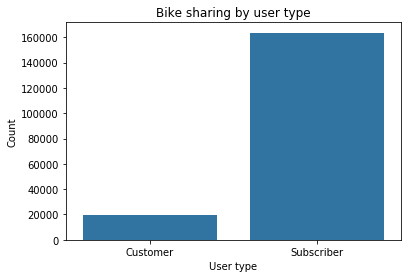

In [30]:
# univariate plot of user type 
base_color=sb.color_palette()[0]
sb.countplot(data=bike_sharing_clean, x='user_type', color= base_color)
plt.xticks();
plt.xlabel('User type')
plt.ylabel('Count')
plt.title('Bike sharing by user type');

### This plot tried to understand what user types mainly use bike sharing system. The definition of user types is following:  “Subscriber” = Member or “Customer” = Casual. I found that Subscribers are the main users of bike sharing system. 

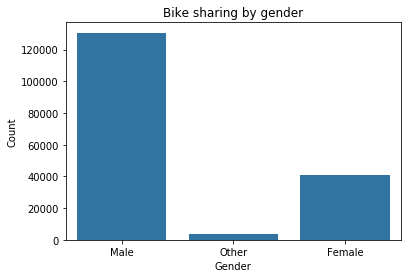

In [31]:
# univariate plots of user's gender 
base_color=sb.color_palette()[0]
sb.countplot(data=df_gender, x='member_gender', color= base_color)
plt.xticks();
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bike sharing by gender');

### I am using the data from 2019 and it still had information about member's gender. However, recent data does not have this information.The above plot gives us insight that majority of users are male. 

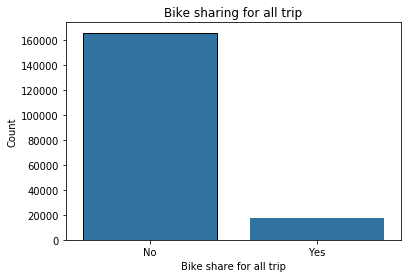

In [62]:
# univariate plots of users if they used bike sharing for all trip 
base_color=sb.color_palette()[0]
sb.countplot(data=bike_sharing_clean, x='bike_share_for_all_trip', color= base_color, edgecolor='black')
plt.xticks();
plt.xlabel('Bike share for all trip')
plt.ylabel('Count')
plt.title('Bike sharing for all trip');

### This plot shows us that most of the users do not use bikes for all trip.

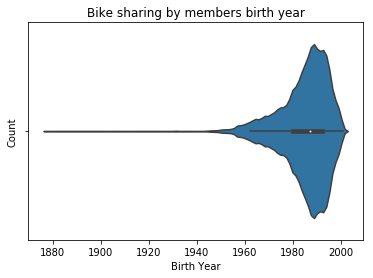

In [33]:
#univariate plots of users birth year
base_color=sb.color_palette()[0]
sb.violinplot(data=df_gen_by, x='member_birth_year', color= base_color)
plt.xticks();
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.title('Bike sharing by members birth year');

### Comment: We can see that majority of the users are born 1980s  and 2000s.

# Bivariate Exploration

In the previous, I looked at the univariate distribution of three features in the bike share dataset: gender, bike share for all trip, and bike sharing by user type. Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to user type.
To start, construct a plot of the user type against start time of bike sharing.

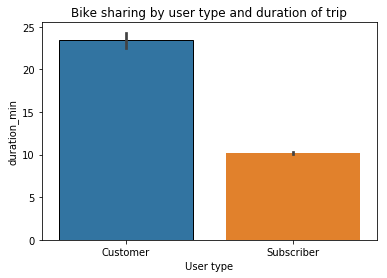

In [63]:
# bivariate plot of user type vs. duration of the trip
sb.barplot(data=bike_sharing_clean, x='user_type', y='duration_min', edgecolor='black');
plt.xlabel('User type')
plt.ylabel('duration_min');
plt.title('Bike sharing by user type and duration of trip');

### Comment: Looks like customers use bike sharing on average more than 20 mins while the subscribers on average 10 minutes. 

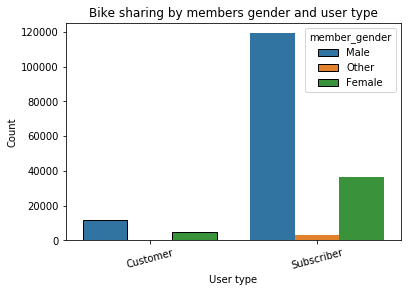

In [35]:
# bivariate plot of user type vs. gender of member's in bike sharing
sb.countplot(data=df_gender, x='user_type', hue ='member_gender', edgecolor='black');
plt.xticks(rotation=15);
plt.xlabel('User type')
plt.ylabel('Count');
plt.title('Bike sharing by members gender and user type');

### Comment: Above I used clustered bar chart to be able to analyze two categorical variables. We can see that among members who are customers majority of users are male while the similar characteristics prevail in subscriber category as well. 

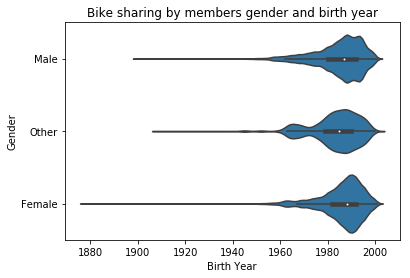

In [36]:
#bivariate plots of member_gender and member_birth_year
base_color=sb.color_palette()[0]
sb.violinplot(data=df_gen_by, x='member_birth_year', y= 'member_gender', color= base_color, edgecolor='black')
plt.xticks();
plt.xlabel('Birth Year')
plt.ylabel('Gender')
plt.title('Bike sharing by members gender and birth year');

### Comment: The plot shows the majority of member's gender falls in to 1990s age group.

In [37]:
#lets take  alook at the top 10 stations that is used for bike sharing. For that we need to do additional work 
#create a new dataframe called temp_df with start station name.
#include duration_min column 

temp_df = bike_sharing_clean.groupby('start_station_name').count()['duration_min'].reset_index()
temp_df = temp_df.sort_values(by=['duration_min'], ascending=False)
temp_df.head()

,start_station_name,duration_min
199,Market St at 10th St,3904
260,San Francisco Caltrain Station 2 (Townsend St...,3544
82,Berry St at 4th St,3052
220,Montgomery St BART Station (Market St at 2nd St),2895
241,Powell St BART Station (Market St at 4th St),2760


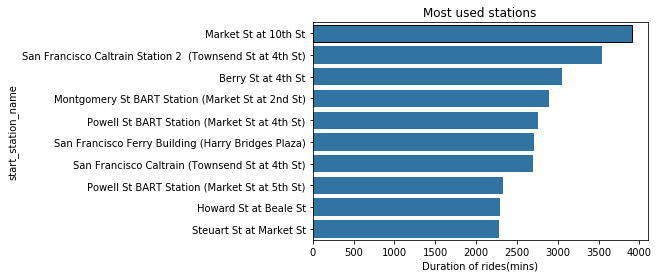

In [38]:
#Compare the most popular stations and the duration of time 
base_color=sb.color_palette()[0]
sb.barplot(data=temp_df[0:10], x='duration_min', y='start_station_name', color= base_color, edgecolor='black' );
plt.xlabel('Duration of rides(mins)')
plt.title('Most used stations');

### Comment: Market St at 10th St and San Fransico Caltrain Station 2 are major stations where trips started.

In [39]:
#I am also curious what are the top 10 end stations for the bike sharing service users
#We can replicate the same steps above
temp_df = bike_sharing_clean.groupby('end_station_name').count()['duration_min'].reset_index()
temp_df = temp_df.sort_values(by=['duration_min'], ascending=False)
temp_df.head()

,end_station_name,duration_min
260,San Francisco Caltrain Station 2 (Townsend St...,4857
199,Market St at 10th St,3973
220,Montgomery St BART Station (Market St at 2nd St),3647
262,San Francisco Ferry Building (Harry Bridges Pl...,3368
241,Powell St BART Station (Market St at 4th St),2997


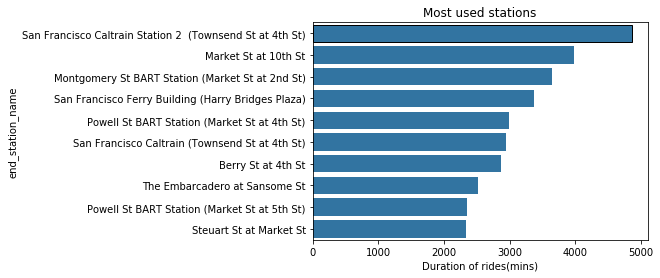

In [40]:
base_color=sb.color_palette()[0]
sb.barplot(data=temp_df[0:10], x='duration_min', y='end_station_name', color= base_color, edgecolor='black');
plt.xlabel('Duration of rides(mins)')
plt.title('Most used stations');

### Comment: Market St at 10th St and San Fransico Caltrain Station 2 are major stations where trips ended as well.

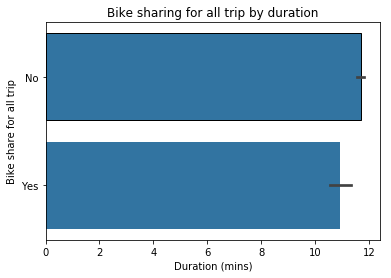

In [41]:
#How long does the average trip take for all trip?
base_color=sb.color_palette()[0]
ax = sb.barplot(data=bike_sharing_clean, x='duration_min', y= 'bike_share_for_all_trip', color= base_color, edgecolor='black')
plt.xlabel('Duration (mins)')
plt.ylabel('Bike share for all trip')
plt.title('Bike sharing for all trip by duration');

### Above findings show that the duration of the trip where users used bike share for all the trip is about 11 minutes.

In [41]:
#earlier in the data wrangling stage I converted the start_time and end_time columns into datatime type. This will be handy because we can now explore the datatime variable.
#Here I am repasting the conversion to datetime data type.

bike_sharing_clean['start_time'] = pd.to_datetime(bike_sharing_clean['start_time'])
bike_sharing_clean['end_time'] = pd.to_datetime(bike_sharing_clean['end_time'])

In [42]:
#Now lets take a look at the start_time column first where I will extract and engineer the start hour of the day and start day of the week.

bike_sharing_clean['start_hourofday'] = bike_sharing_clean.start_time.dt.strftime('%H')
bike_sharing_clean['start_dayofweek'] = bike_sharing_clean.start_time.dt.strftime('%A')

### Using this, I will do the analysis based on  questions by creating a series of count plots to explore the trips distribution over hour-of-day and day-of-week.

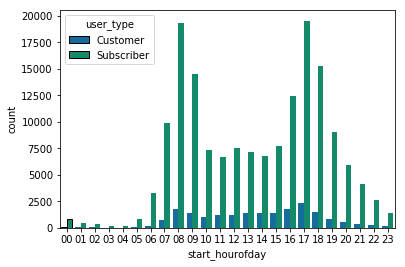

In [44]:
#I am interested in looking at when did the bike sharing trips had peaks in terms of hour of the day. 

sb.countplot(data=bike_sharing_clean, x ='start_hourofday', hue='user_type', palette='colorblind', edgecolor='black');


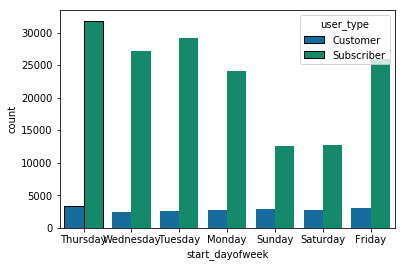

In [47]:
#I am interested in looking at when did the bike sharing trips had peaks in terms of week of the day. 
sb.countplot(data=bike_sharing_clean, x ='start_dayofweek', hue='user_type', palette='colorblind', edgecolor='black');

### Comment: We can observe that Thursdays and Tuesday had the highest number of bike sharing trips happening and the 8-9 am and 5- pm were the hours when majority of the trips started.

In [64]:
#Now lets take a look at the end_time column first where I will extract the end hour of the day and end day of the week.
bike_sharing_clean['end_hourofday'] = bike_sharing_clean.end_time.dt.strftime('%H')
bike_sharing_clean['end_dayofweek'] = bike_sharing_clean.end_time.dt.strftime('%A')

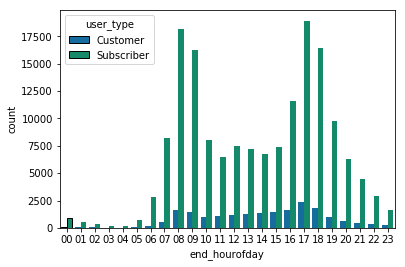

In [65]:
#I am interested in looking at when did the bike sharing trips had peaks in . 
sb.countplot(data=bike_sharing_clean, x ='end_hourofday', hue='user_type', palette='colorblind', edgecolor='black');

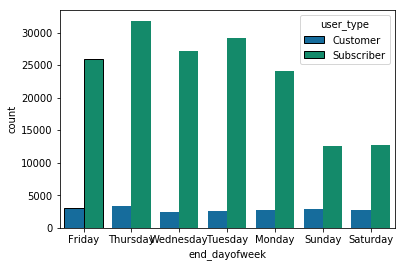

In [66]:
##lets plot the bike sharing trips had peaks in terms of week of the day for end of the trip column. 
sb.countplot(data=bike_sharing_clean, x ='end_dayofweek', hue='user_type', palette='colorblind', edgecolor='black');

### We can observe that Thursdays and Tuesday had the highest number of bike sharing trips happening and the 8-9 am and 5- 6 pm were the hours when majority of the trips ended.

# Multivariate plots

#### Here I am interested in multiple variables such what day of the week had the highest users by user type and what was the duration in minutes? Specifcially, when was the bussiest day of the week and hour?  What type of users were using those times?

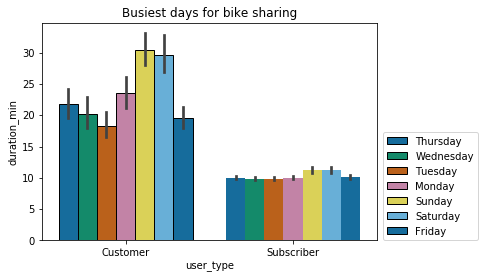

In [55]:
#Plot barplot by exploring the start day of the week column, user type and duration of the tip 
ax = sb.barplot(data=bike_sharing_clean, x= 'user_type', y='duration_min', hue='start_dayofweek', palette='colorblind', edgecolor='black')
plt.legend(loc=(1.02,0));
plt.title ('Busiest days for bike sharing');

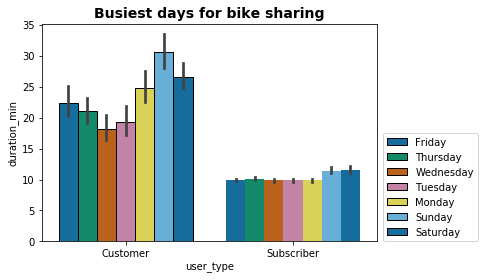

In [56]:
#Lets replicate same steps for the end day of the week column, user type and duration of thr trip.

ax = sb.barplot(data=bike_sharing_clean, x= 'user_type', y='duration_min', hue='end_dayofweek', palette='colorblind', edgecolor='black')
plt.legend(loc=(1.02,0));

plt.title ('Busiest days for bike sharing', y=1, fontsize=14, weight='bold');

### Comment: The above plots show that busiest days for bike sharing are Sunday and Saturdays with the duration of the trips between 25~30 mins in average. We can also depict that user type named customers have the higher duration compared to subcribers.

### Another observation from above earlier we found out that the most trips started at 8 am and 5 pm, and ended in the same time slots. This makes sense becasue the duration of the trips are between 25-30 minutes so if the trip started at 8 am and it should end around 8:25 or 8:30. 


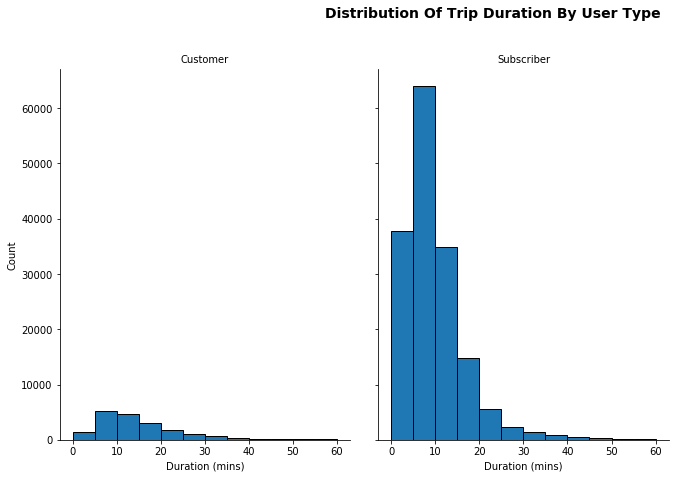

In [67]:
#lets find out what is the duration of the trip by type of user.
## Set Plot Dimensions - FIGURE LEVEL
 
bin_edges = np.arange(0, bike_sharing_clean['duration_min'].quantile(0.99)+5, 5)
g= sb.FacetGrid(data=bike_sharing_clean, col='user_type', col_wrap=3)
g.map(plt.hist, 'duration_min', bins=bin_edges, edgecolor='black');

#titles and labels
g.set_axis_labels(x_var="Duration (mins)", y_var="Count");
g.set_titles('{col_name}');

#set plot dimensions 
g.fig.set_size_inches(14.2, 7.5)

#if visuzlaization has subplots as Main title 
plt.suptitle ("Distribution of Trip duration by User Type".title(), y=1, fontsize=14, weight='bold');

### Looks like this again validates above work where we saw there are more subscribers using bike sharing srevices than customers. Both user types `Subscriber` and `Customer` overall have used bike sharing for about 10~20 minutes.

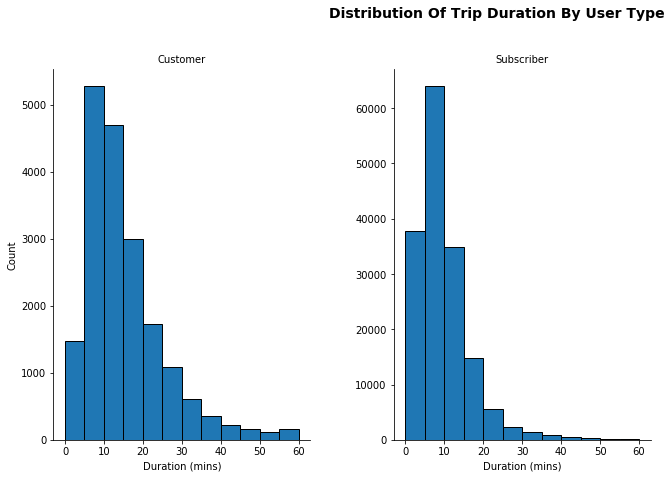

In [68]:
#lets find out what is the duration of the trip by type of user.
## Set Plot Dimensions - FIGURE LEVEL
 
bin_edges = np.arange(0, bike_sharing_clean['duration_min'].quantile(0.99)+5, 5)
g= sb.FacetGrid(data=bike_sharing_clean, col='user_type', col_wrap=3, sharey=False)
g.map(plt.hist, 'duration_min', bins=bin_edges, edgecolor='black');

#titles and labels
g.set_axis_labels(x_var="Duration (mins)", y_var="Count");
g.set_titles('{col_name}');


#set plot dimensions 
g.fig.set_size_inches(14.2, 7.5)

#if visuzlaization has subplots as Main title 
plt.suptitle ("Distribution of Trip duration by User Type".title(), y=1, fontsize=14, weight='bold');

### Comment: This plot here represents diffirent y-axis variables and depicts the duration of the type spent on the trip by user type.

# Insights

-	I found that Subscribers are the main users of bike sharing system. So, the bike sharing system can target customer user type to expand their consumer segment.
-	The majority of users are male. For reference, Bike sharing companies could target female users in the future and engage them in using bike sharing services.
-	Actually, by plotting the start_station and the end_station I was able to identify the two major stations that bike users start and end their trip. The above results show that San Francisco Caltrain Station 2 and Market St at 10th St are the two major stations; these stations are probably the center of the city thus a lot of the users start or end their trips here and perhaps if the Bay Wheels would like to gain higher number of users can increase number of available bike sharing service in those stations. 
-	Another observation from above earlier we found out that the most trips started at 8-9 am and 5-6 pm and ended in the same time slots. 
-	The above plots show that busiest days for bike sharing are Sunday and Saturdays with the duration of the trips between 25~30 mins in average.


